# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 




-----

## Imports

In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


# Data Preprocessing

In [10]:
df['Channel'].nunique()

2

In [6]:
df['Region'].nunique()

3

In [7]:
df['Channel'] = df['Channel'].astype('category')

In [8]:
df['Region'] = df['Region'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    category
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(2), int64(6)
memory usage: 21.9 KB


## EDA



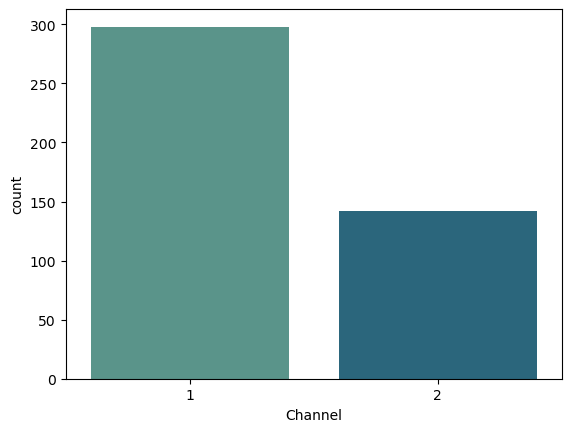

In [15]:
sns.countplot(data = df, x = 'Channel',palette = 'crest')
plt.show()

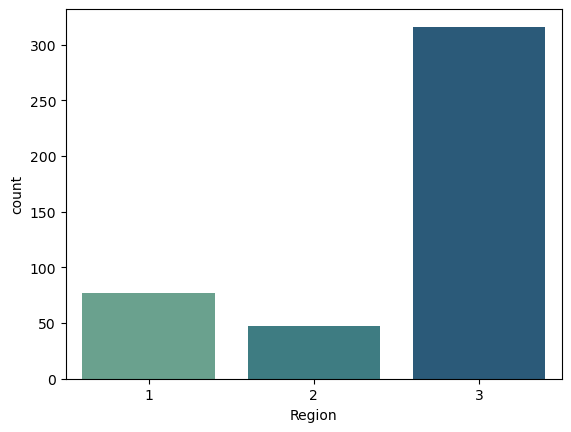

In [16]:
sns.countplot(data = df, x = 'Region',palette = 'crest')
plt.show()

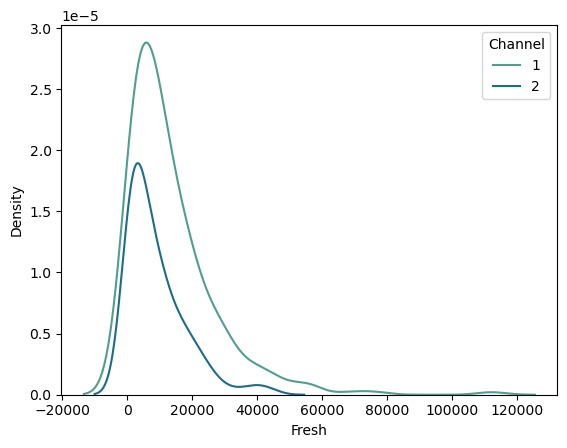

In [25]:
sns.kdeplot(data = df , x = 'Fresh',hue = 'Channel',palette = 'crest')
plt.show()

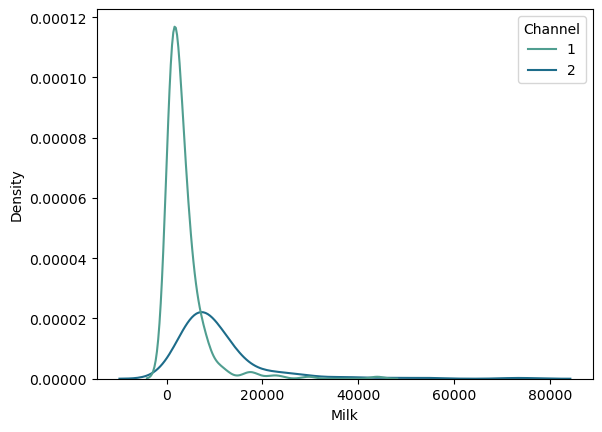

In [24]:
sns.kdeplot(data = df , x = 'Milk',hue = 'Channel',palette = 'crest')
plt.show()

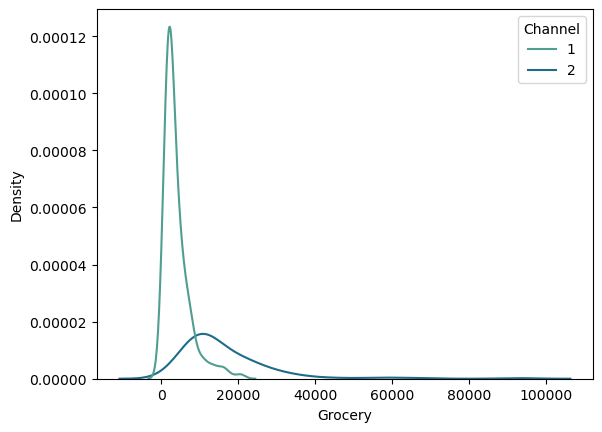

In [23]:
sns.kdeplot(data = df , x = 'Grocery',hue = 'Channel',palette = 'crest')
plt.show()

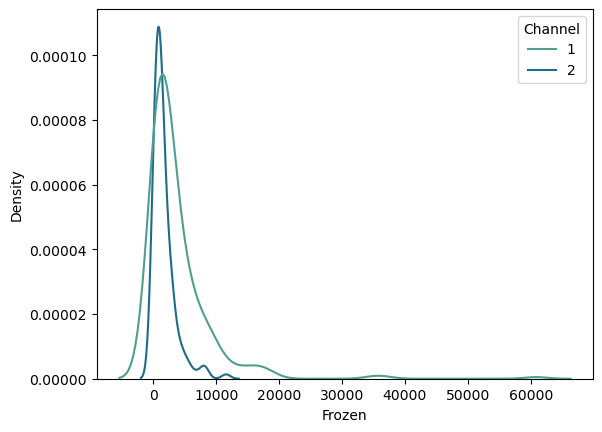

In [26]:
sns.kdeplot(data = df , x = 'Frozen',hue = 'Channel',palette = 'crest')
plt.show()

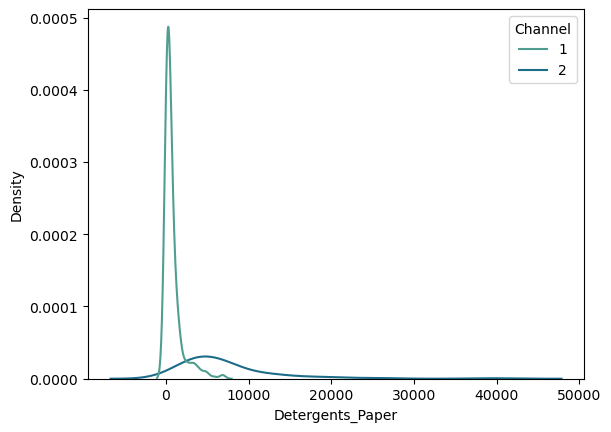

In [30]:
sns.kdeplot(data = df , x = 'Detergents_Paper',hue = 'Channel',palette = 'crest')
plt.show()

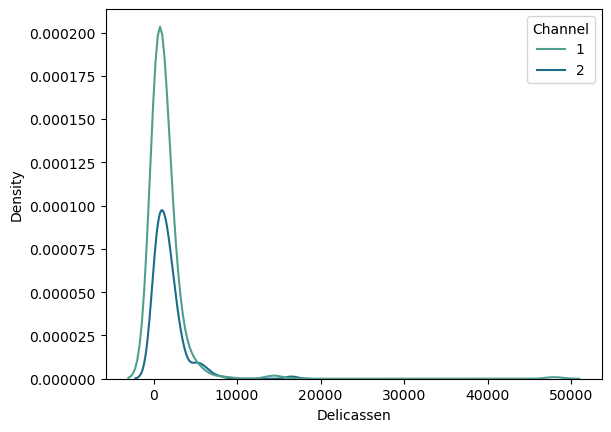

In [31]:
sns.kdeplot(data = df , x = 'Delicassen',hue = 'Channel',palette = 'crest')
plt.show()

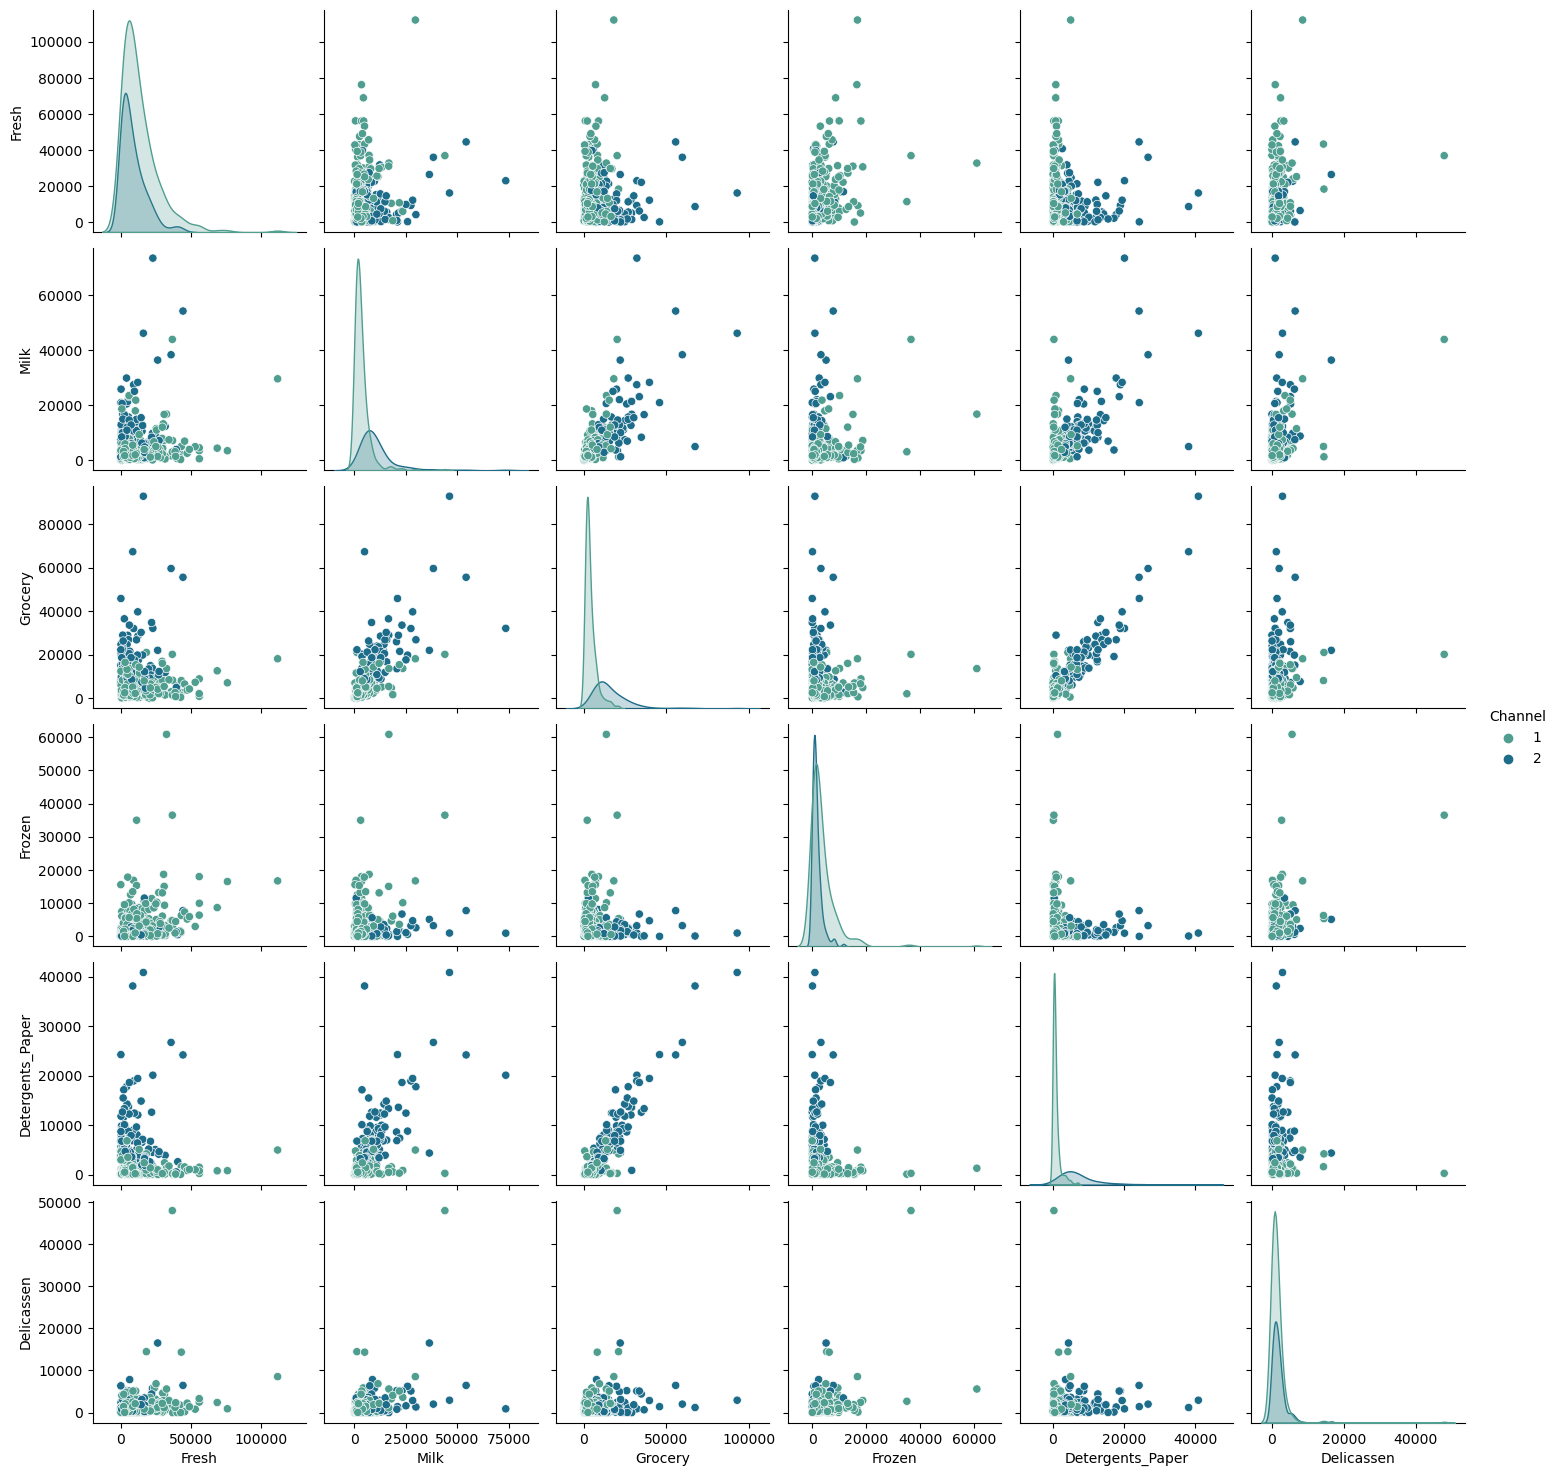

In [32]:
sns.pairplot(data = df,hue = 'Channel',palette = 'crest')

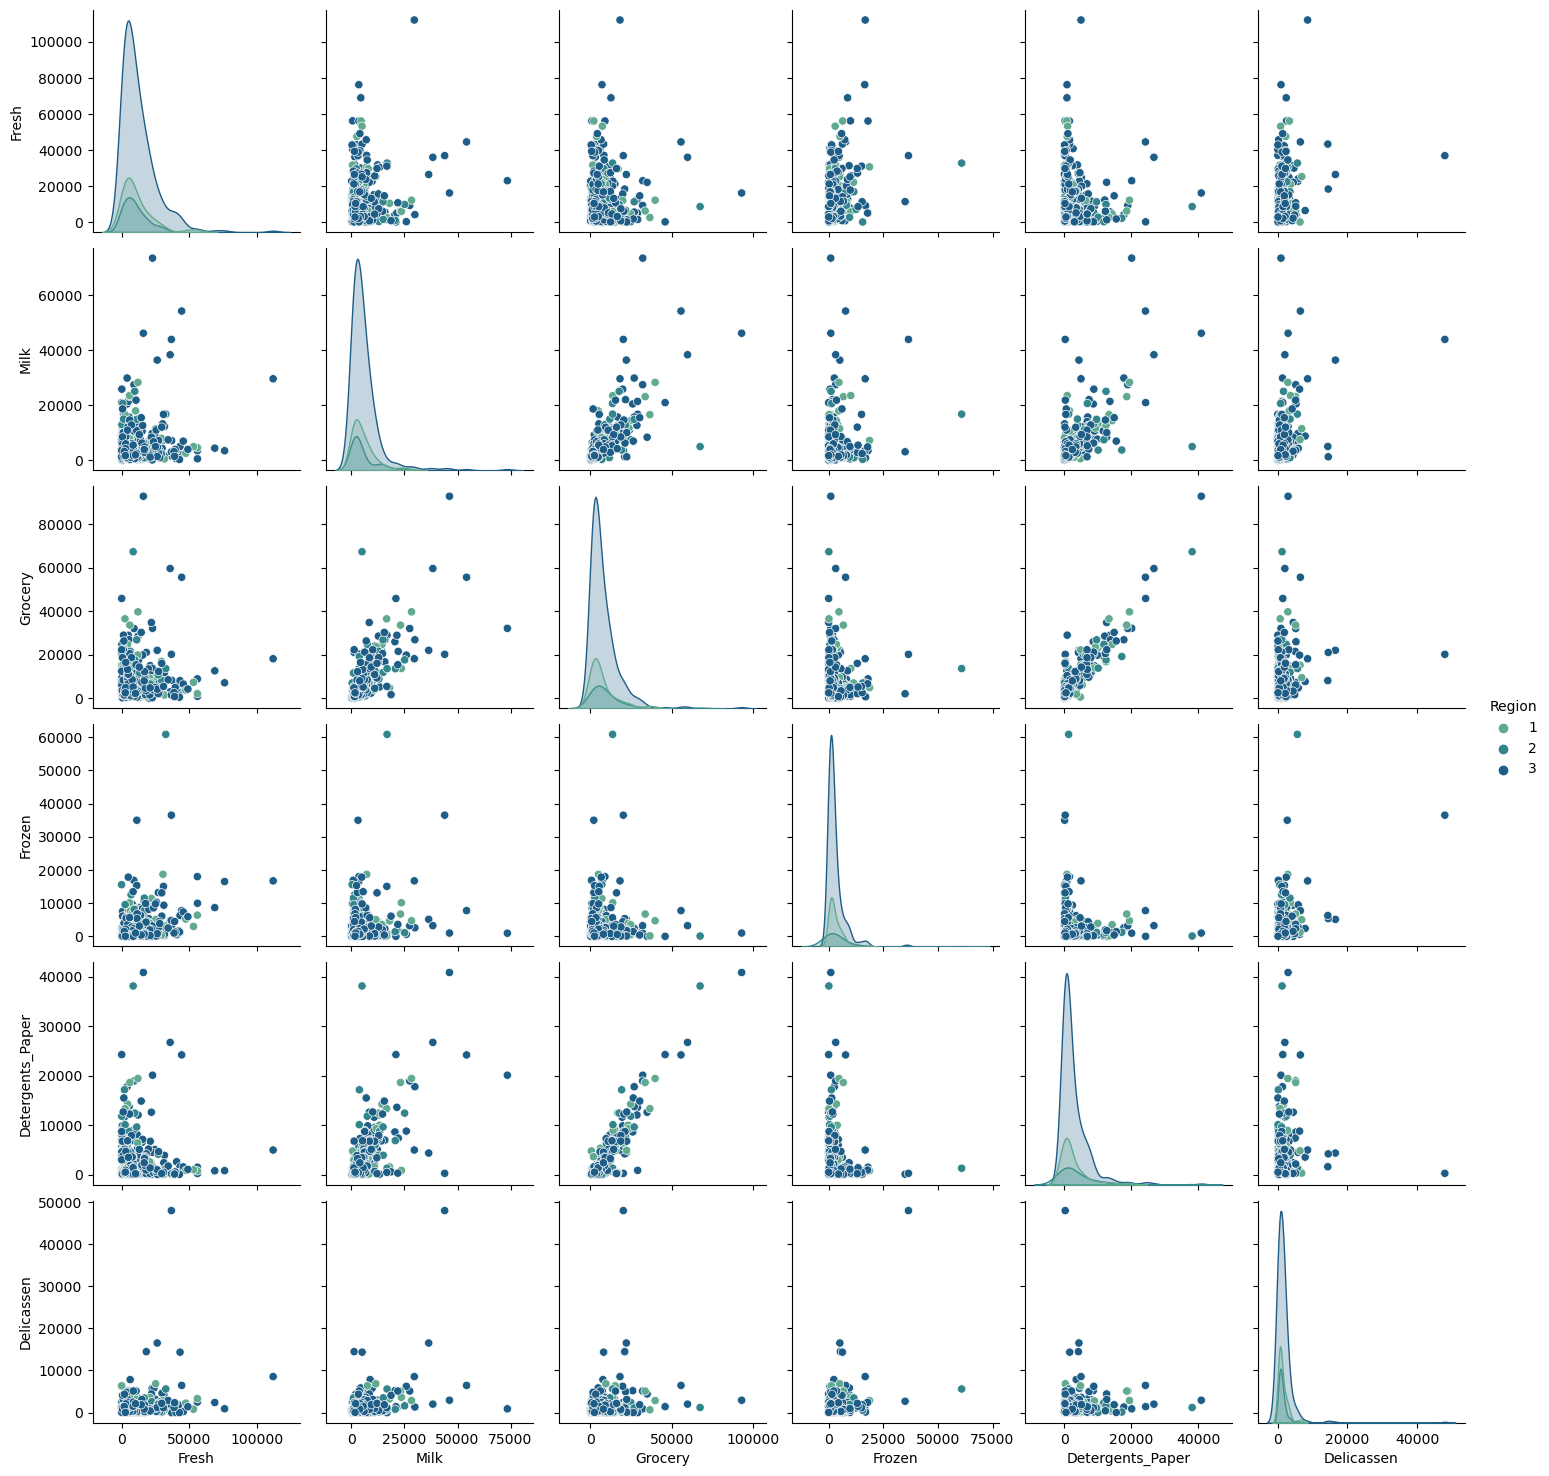

In [33]:
sns.pairplot(data = df,hue = 'Region',palette = 'crest')

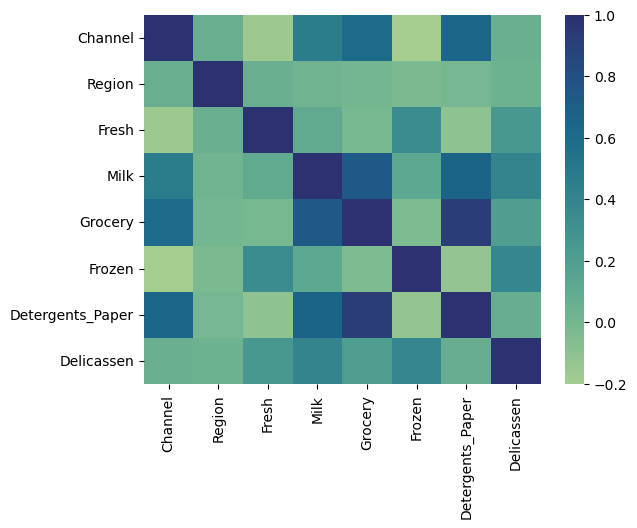

In [40]:
sns.heatmap(df.corr(),cmap="crest")
plt.show()

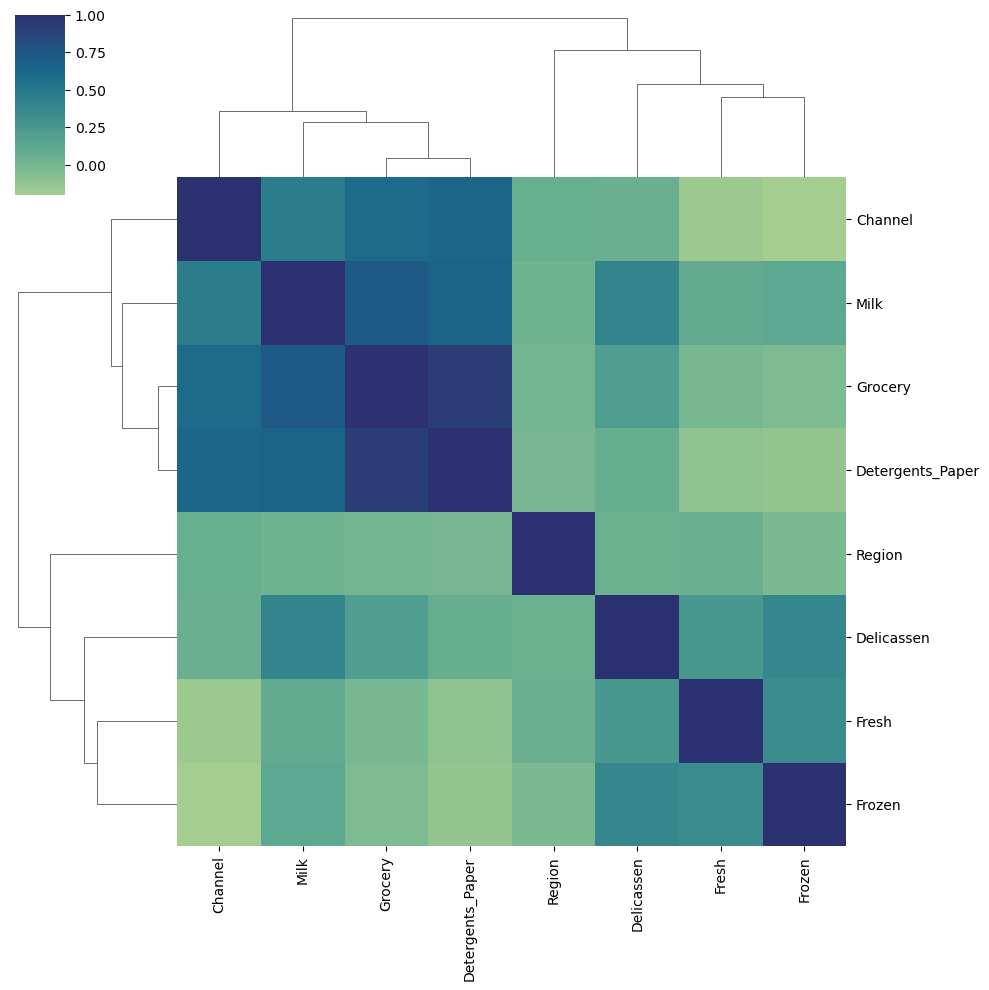

In [39]:
sns.clustermap(df.corr(),cmap="crest")
plt.show()

## DBSCAN



### Standard Scaler

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
scaled_df = scaler.fit_transform(df)

In [44]:
scaled_df

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

## Model Development

In [45]:
from sklearn.cluster import DBSCAN

In [49]:
min_samples = 2*scaled_df.shape[1]

In [50]:
min_samples

16

In [66]:
per_outlier = []
no_of_outlier = []

for eps in np.linspace(0.001,5,100):
    dbscan_test = DBSCAN(eps = eps,min_samples= 16)
    dbscan_test.fit(scaled_df)
    
    no_of_outlier.append(np.sum(dbscan_test.labels_ == -1))
    per_outlier.append((np.sum(dbscan_test.labels_ == -1)/len(dbscan_test.labels_))*100)
    

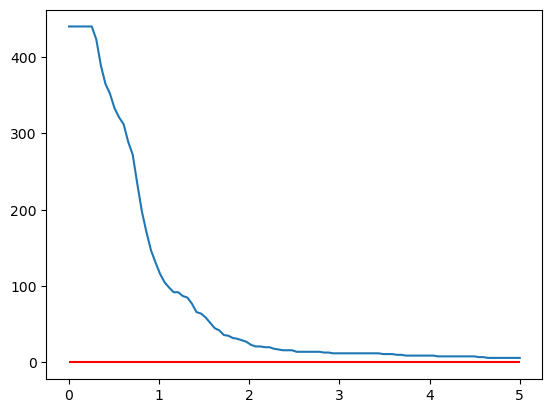

In [64]:
sns.lineplot(x = np.linspace(0.001,5,100),y = no_of_outlier)
plt.hlines(y = 0, xmin = 0,xmax = 5,color = 'red')

<Axes: >

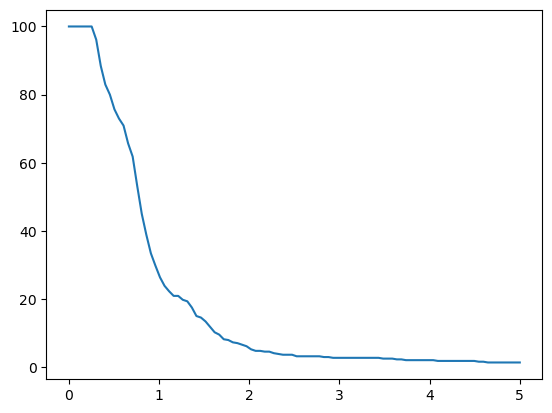

In [65]:
sns.lineplot(x = np.linspace(0.001,5,100),y = per_outlier)

## DBSCAN with Chosen Epsilon

**Based on the plot created previously , retrain a DBSCAN model with a reasonable epsilon value. Choosing the epsilon value of 2**

In [67]:
dbscan = DBSCAN(eps = 2, min_samples= 16)
dbscan.fit(scaled_df)

DBSCAN(eps=2, min_samples=16)

<Axes: xlabel='Grocery', ylabel='Milk'>

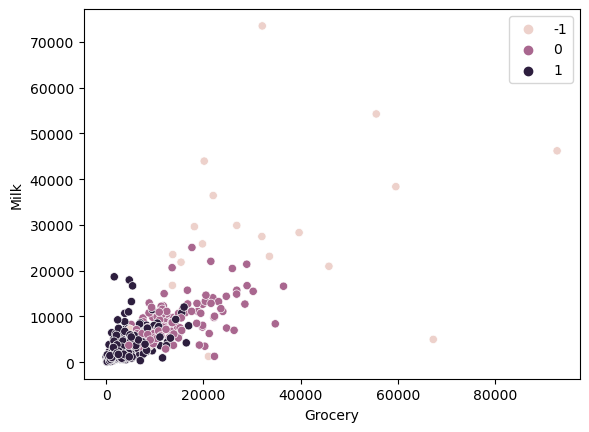

In [69]:
sns.scatterplot(data=df,x='Grocery',y='Milk',hue=dbscan.labels_)

<Axes: xlabel='Detergents_Paper', ylabel='Milk'>

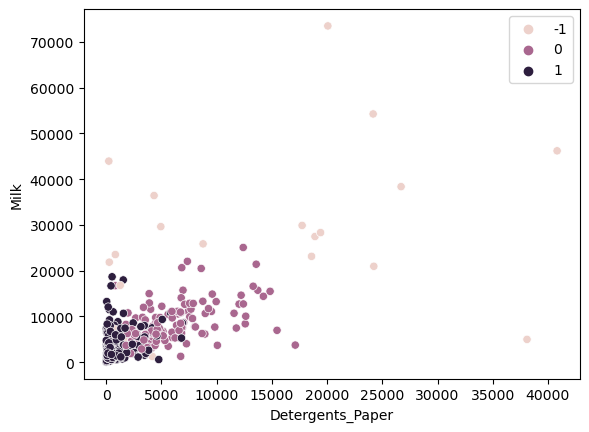

In [70]:
sns.scatterplot(data=df,x='Detergents_Paper',y='Milk',hue=dbscan.labels_)

In [71]:
df['labels'] = dbscan.labels_

In [72]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


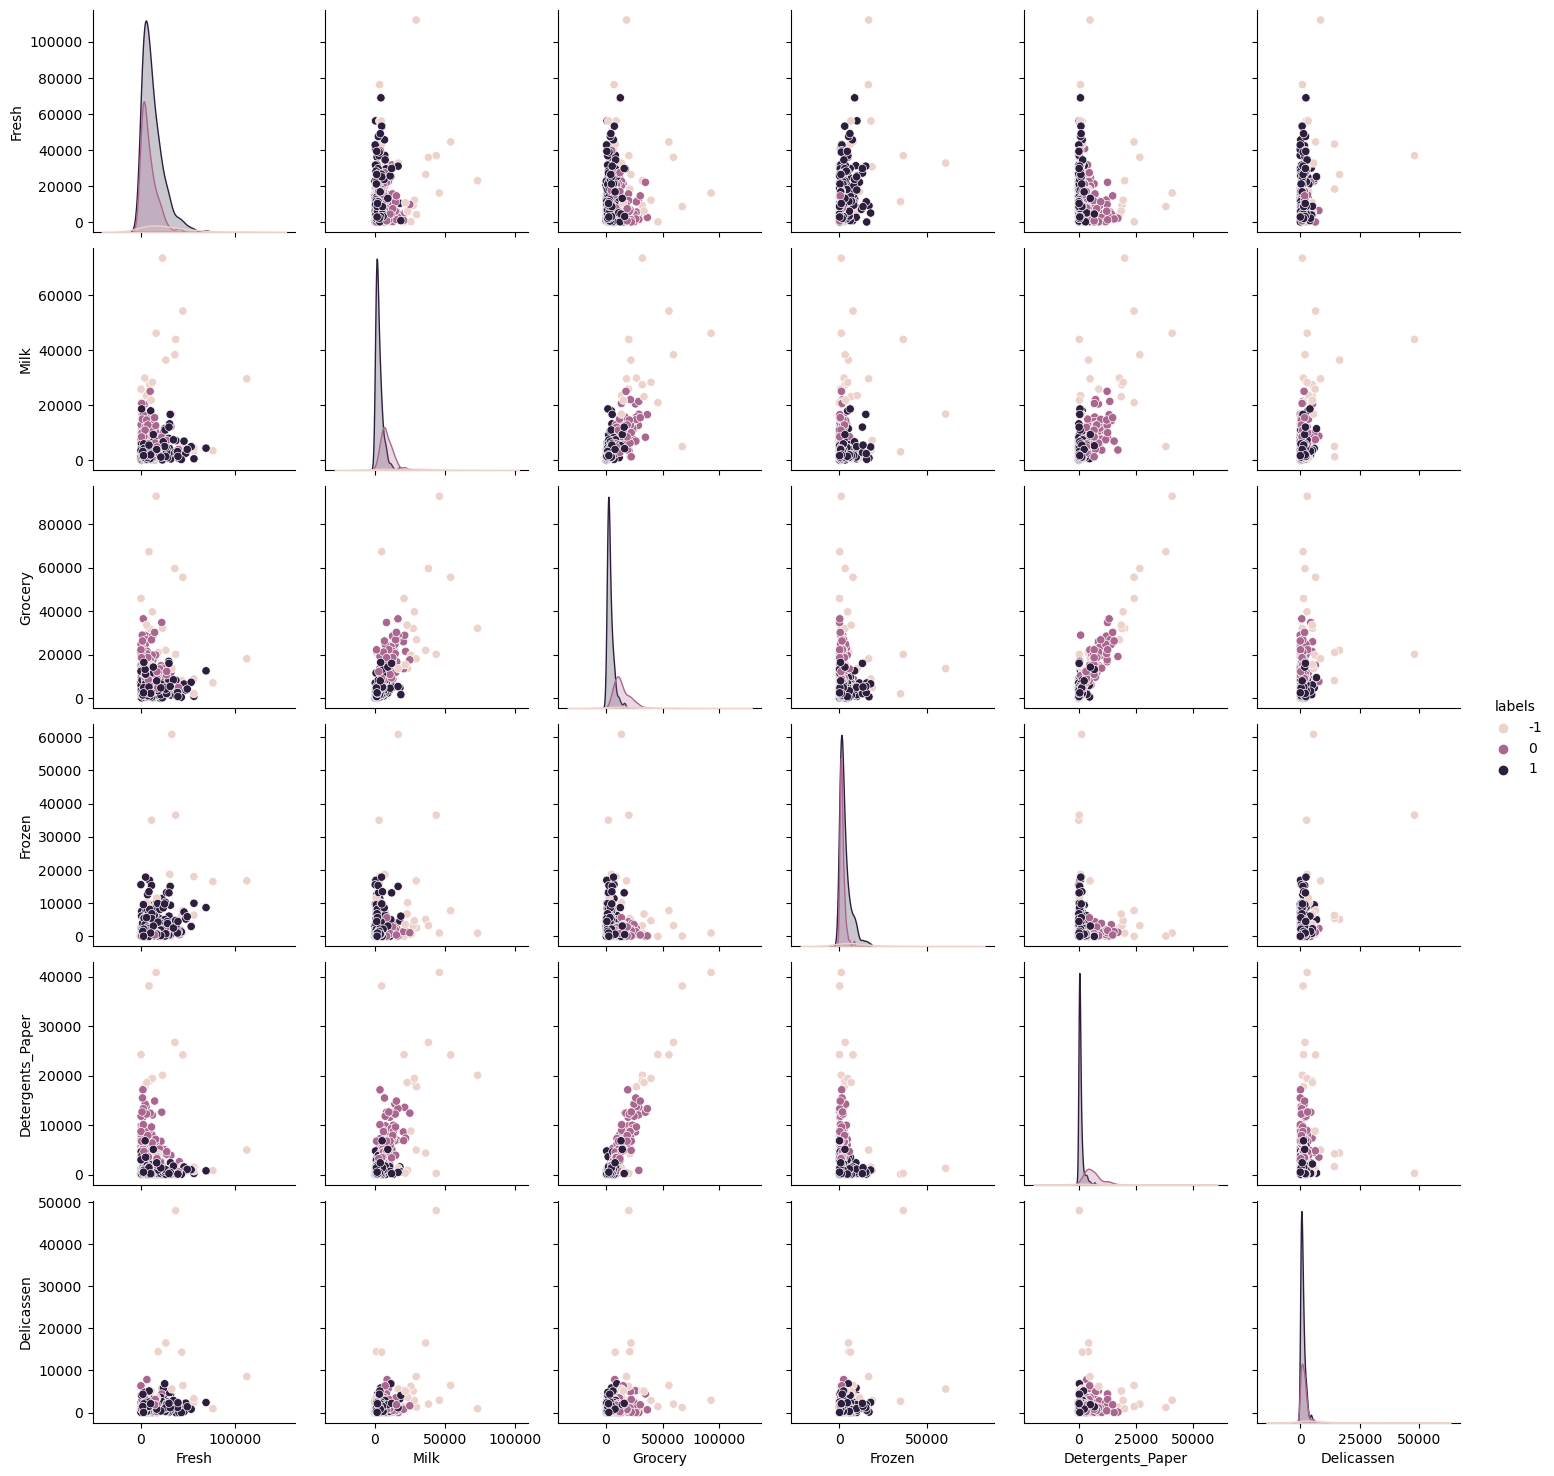

In [74]:
sns.pairplot(data = df,hue = 'labels')

In [75]:
cat = df.drop(['Region','Channel'],axis = 1)

In [76]:
cat

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,1


In [82]:
cat_sum = cat.groupby('labels').sum()

In [83]:
cat_sum

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,693248,574174,665240,282241,279339,167679
0,1061369,1111445,1787898,186761,770076,193301
1,3525514,864738,1045424,882648,218442,309963


In [84]:
cat_mean = cat.groupby('labels').mean()

In [85]:
cat_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


In [86]:
 from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler_1 = MinMaxScaler()

In [95]:
scaled_cat_sum = scaler_1.fit_transform(cat_sum)

In [96]:
pd.DataFrame(scaled_cat_sum,cat_sum.index,cat_sum.columns)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,0.000000,0.000000,0.000000,0.137206,0.110394,0.000000
0,0.129974,1.000000,1.000000,0.000000,1.000000,0.180076
1,1.000000,0.540815,0.338646,1.000000,0.000000,1.000000


In [97]:
scaled_cat_mean = scaler_1.fit_transform(cat_mean)

In [99]:
scaled_cat_mean_df = pd.DataFrame(scaled_cat_mean,cat_mean.index,cat_mean.columns)

In [100]:
scaled_cat_mean_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.280408,0.444551,0.000000,0.500087,0.073741
1,0.210196,0.000000,0.000000,0.166475,0.000000,0.000000


<Axes: ylabel='labels'>

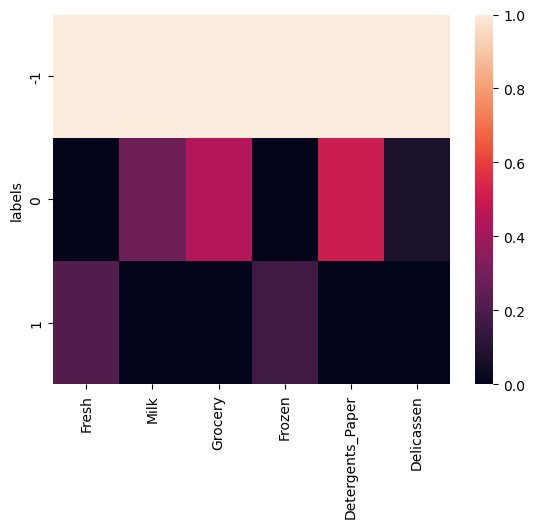

In [101]:
sns.heatmap(scaled_cat_mean_df)

<Axes: ylabel='labels'>

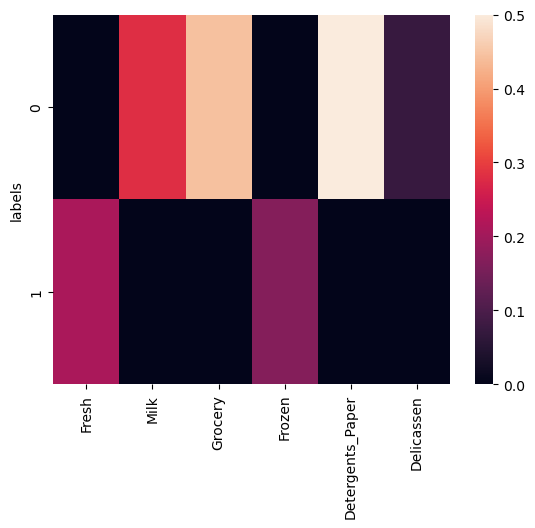

In [102]:
sns.heatmap(scaled_cat_mean_df.loc[[0,1]])

**We can see that Detergents Paper was the most significant difference.**